# Project notebook

- Easy access to all the experimental data generated in the lab
- All the results from statistical analysis
- Visualization of reports
- All the the python functionality at hand

## Library import

In [1]:
from report_manager import project, analysisResult
from plotly.offline import init_notebook_mode, iplot
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


*


*  Package WGCNA 1.66 loaded.
*








## Creating a Project object

- Connects to the database
- Extracts all the project information depending on the data types: Cinical, Proteomics, Whole-exome sequencing, etc.
- Runs all the default analyses
- Returns all datasets and analyses results, and plots

In [2]:
p = project.Project('P0000001', datasets=None, report={})

<class 'int'>
  
 Power
 SFT.R.sq
 slope
 truncated.R.sq
  mean.k.
 median.k.
  max.k.

1 
     1
    0.457
 -3.89
         0.9560
 71.60000
  6.96e+01
 110.000

2 
     2
    0.703
 -3.15
         0.9820
 15.90000
  1.47e+01
  36.300

3 
     3
    0.849
 -2.72
         0.9920
  4.52000
  3.95e+00
  14.700

4 
     4
    0.908
 -2.45
         0.9750
  1.54000
  1.21e+00
   6.920

5 
     5
    0.931
 -2.22
         0.9700
  0.60600
  4.19e-01
   3.680

6 
     6
    0.977
 -1.86
         0.9800
  0.27200
  1.57e-01
   2.180

7 
     7
    0.319
 -3.08
         0.1960
  0.13900
  6.44e-02
   1.780

8 
     8
    0.321
 -2.73
         0.1930
  0.07940
  2.78e-02
   1.610

9 
     9
    0.297
 -3.11
         0.1330
  0.05070
  1.25e-02
   1.480

10
    10
    0.188
 -2.26
        -0.0374
  0.03550
  5.73e-03
   1.380

11
    11
    0.256
 -2.39
         0.0511
  0.02680
  2.59e-03
   1.290

12
    12
    0.174
 -2.10
        -0.0369
  0.02150
  1.26e-03
   1.220

13
    13
    0.238
 -2.

## Visualizing the Project report

In [3]:
plots = p.show_report("notebook")

## Access to datasets

### Clinical data

In [4]:
clin_dataset = p.get_dataset('clinical').get_dataset('processed')
clin_dataset.head()

Age  Alanine aminotransferase measurement  \
subject biological_sample                                               
S30     BS30               73.0                                  24.0   
S31     BS31               49.0                                  27.0   
S32     BS32               66.0                                  18.0   
S33     BS33               61.0                                  22.0   
S34     BS34               44.0                                  18.0   

                           Alkaline phosphatase measurement  \
subject biological_sample                                     
S30     BS30                                           54.0   
S31     BS31                                           27.0   
S32     BS32                                           69.0   
S33     BS33                                          101.0   
S34     BS34                                           61.0   

                           Aspartate aminotransferase measurement  \
subject biological_sample                                           
S30     BS30                                                 30.0   
S31     BS31                                                 28.0   
S32     BS32                                                 21.0   
S33     BS33                                                 26.0   
S34     BS34                                                 25.0   

                           Bilirubin level  Body height  Body mass index  \
subject biological_sample                                                  
S30     BS30                          15.0        182.0        27.774423   
S31     BS31                          17.0        177.0        28.727377   
S32     BS32                           9.0        158.0        28.841532   
S33     BS33                          12.0        165.0        42.056933   
S34     BS34                           8.0        182.0        29.434851   

                           Diastole  Fasting blood glucose level  \
subject biological_sample                                          
S30     BS30                   83.0                         5.07   
S31     BS31                   95.0                         6.09   
S32     BS32                   97.0                         4.93   
S33     BS33                   93.0                         5.33   
S34     BS34                   76.0                         4.80   

                           Gamma glutamyl transferase measurement  \
subject biological_sample                                           
S30     BS30                                                 21.0   
S31     BS31                                                 38.0   
S32     BS32                                                 18.0   
S33     BS33                                                 20.0   
S34     BS34                                                 13.0   

                           Hemoglobin A1c measurement  \
subject biological_sample                               
S30     BS30                                      6.3   
S31     BS31                                      5.8   
S32     BS32                                      6.2   
S33     BS33                                      6.2   
S34     BS34                                      5.4   

                           High density lipoprotein measurement  \
subject biological_sample                                         
S30     BS30                                               1.26   
S31     BS31                                               1.70   
S32     BS32                                               1.12   
S33     BS33                                               0.91   
S34     BS34                                               1.21   

                           Low density lipoprotein cholesterol measurement  \
subject biological_sample                                                    
S30     BS30                                                          

#### Further dataset manipulation and visualization

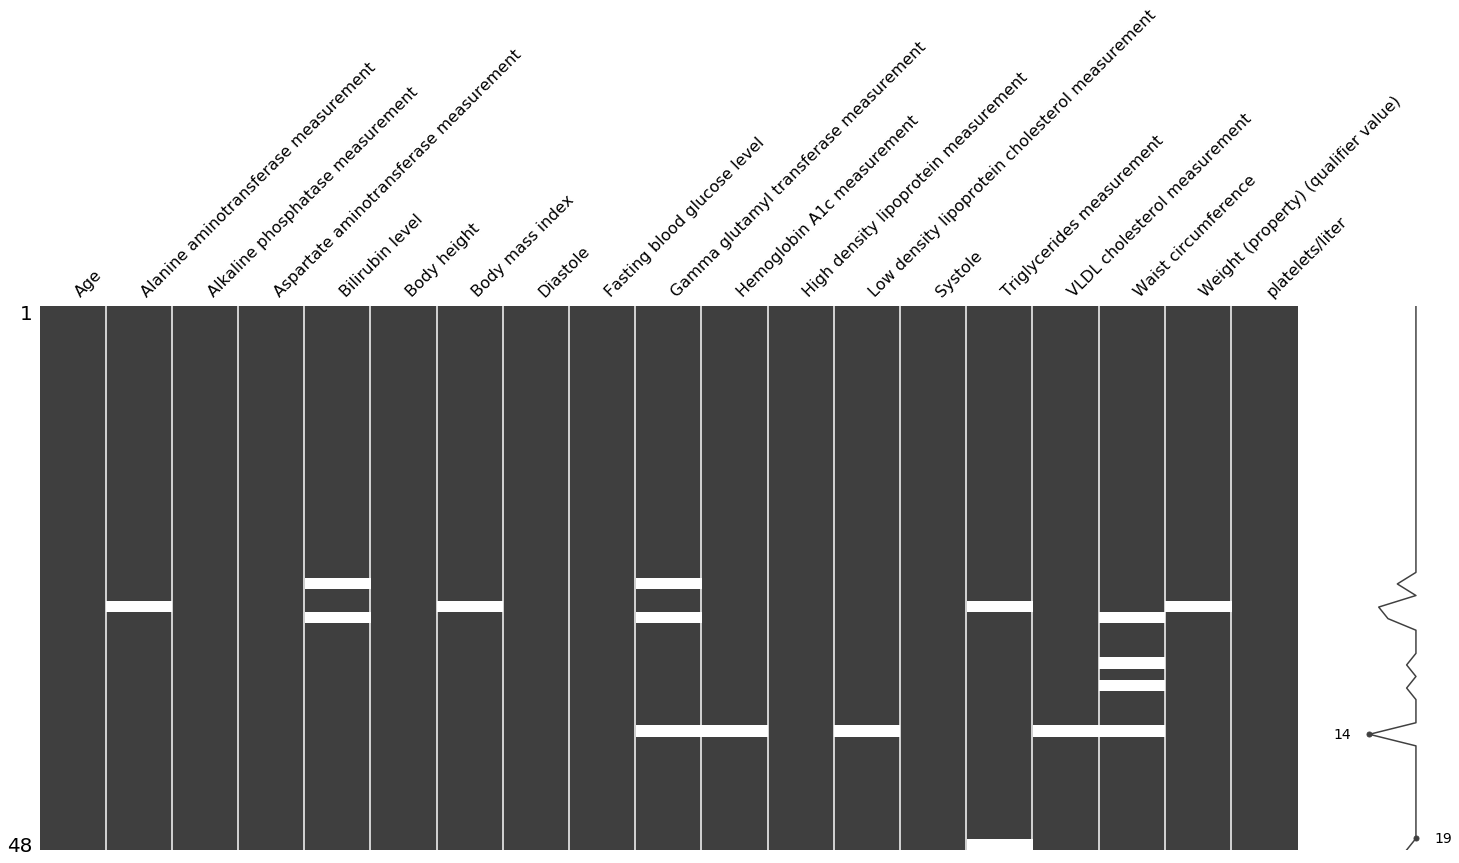

In [5]:
clin_dataset = clin_dataset.reset_index().set_index('subject').drop(['group', 'biological_sample'], axis=1)#.pivot_table(index='subject', columns='clinical_variable', values='value', aggfunc='first')
msno.matrix(clin_dataset)


### Proteomics dataset (original)

In [6]:
dataset = p.get_dataset("proteomics").get_dataset("dataset")

In [7]:
dataset.head()

LFQ_intensity      group identifier     name sample subject
0      36.516120  Cirrhosis     V9HW68  HEL-214   AS70     S70
1      28.612315  Cirrhosis     Q9UL90            AS70     S70
2      26.322769  Cirrhosis     S6BAM6            AS70     S70
3      31.463291  Cirrhosis     S6BGE0            AS70     S70
4      22.469347  Cirrhosis     Q9Y5C1  ANGPTL3   AS70     S70

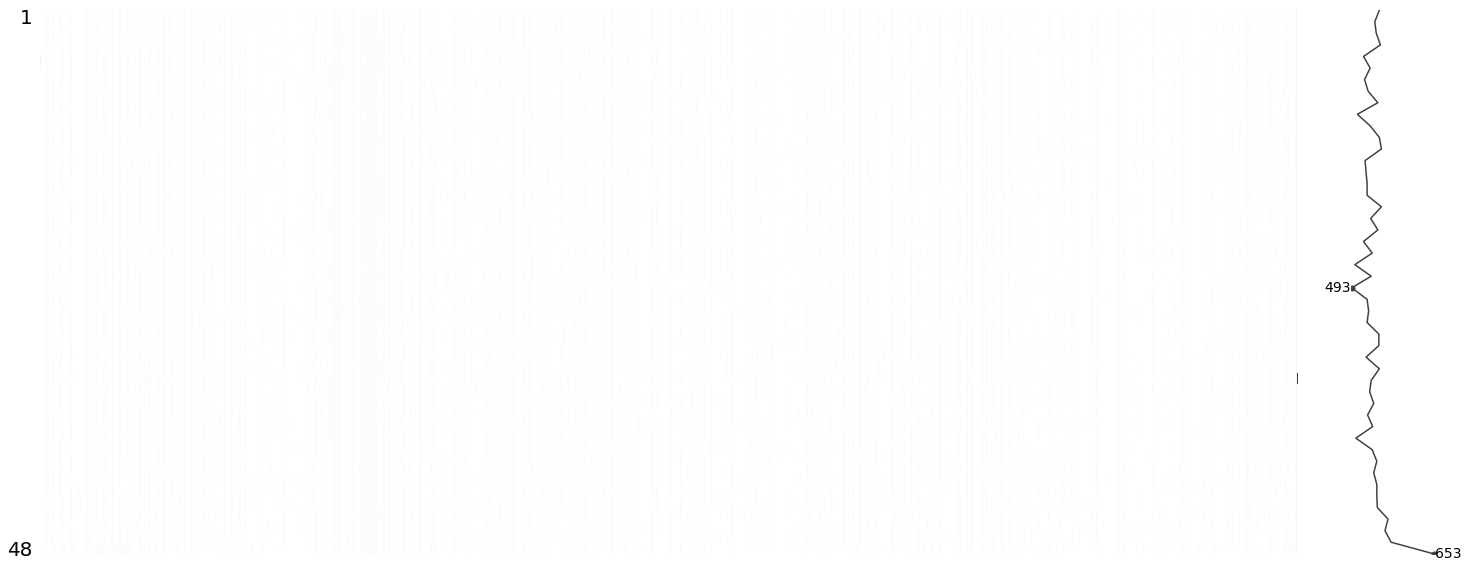

In [8]:
dataset = dataset.drop(['group'], axis=1).pivot_table(index='sample', columns='identifier', values='LFQ_intensity', aggfunc='first')
msno.matrix(dataset)

In [9]:
preprocessed_dataset = p.get_dataset('clinical').get_dataset('processed')
preprocessed_dataset.head()

Age  Alanine aminotransferase measurement  \
subject biological_sample                                               
S30     BS30               73.0                                  24.0   
S31     BS31               49.0                                  27.0   
S32     BS32               66.0                                  18.0   
S33     BS33               61.0                                  22.0   
S34     BS34               44.0                                  18.0   

                           Alkaline phosphatase measurement  \
subject biological_sample                                     
S30     BS30                                           54.0   
S31     BS31                                           27.0   
S32     BS32                                           69.0   
S33     BS33                                          101.0   
S34     BS34                                           61.0   

                           Aspartate aminotransferase measurement  \
subject biological_sample                                           
S30     BS30                                                 30.0   
S31     BS31                                                 28.0   
S32     BS32                                                 21.0   
S33     BS33                                                 26.0   
S34     BS34                                                 25.0   

                           Bilirubin level  Body height  Body mass index  \
subject biological_sample                                                  
S30     BS30                          15.0        182.0        27.774423   
S31     BS31                          17.0        177.0        28.727377   
S32     BS32                           9.0        158.0        28.841532   
S33     BS33                          12.0        165.0        42.056933   
S34     BS34                           8.0        182.0        29.434851   

                           Diastole  Fasting blood glucose level  \
subject biological_sample                                          
S30     BS30                   83.0                         5.07   
S31     BS31                   95.0                         6.09   
S32     BS32                   97.0                         4.93   
S33     BS33                   93.0                         5.33   
S34     BS34                   76.0                         4.80   

                           Gamma glutamyl transferase measurement  \
subject biological_sample                                           
S30     BS30                                                 21.0   
S31     BS31                                                 38.0   
S32     BS32                                                 18.0   
S33     BS33                                                 20.0   
S34     BS34                                                 13.0   

                           Hemoglobin A1c measurement  \
subject biological_sample                               
S30     BS30                                      6.3   
S31     BS31                                      5.8   
S32     BS32                                      6.2   
S33     BS33                                      6.2   
S34     BS34                                      5.4   

                           High density lipoprotein measurement  \
subject biological_sample                                         
S30     BS30                                               1.26   
S31     BS31                                               1.70   
S32     BS32                                               1.12   
S33     BS33                                               0.91   
S34     BS34                                               1.21   

                           Low density lipoprotein cholesterol measurement  \
subject biological_sample                                                    
S30     BS30                                                          

### Proteomics dataset (imputed)

In [ ]:
reg_dataset = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_dataset#.loc[reg_dataset['identifier'] == 'O60341-KDM1A',:]

In [ ]:
result = analysisResult.AnalysisResult("Mapper analysis", analysis_type = "mapper", 
                           args = {"n_cubes": 15,
                                   "overlap": 0.85,
                                   "n_clusters": 2,
                                   "linkage": "single",
                                  "title":"Topological data analysis - Sample stratification"}, data=reg_dataset)
mapper_plot = result.get_plot(name="mapper", identifier="mapper_plot")[0]

In [ ]:
#iplot(mapper_plot.figure)

## Analyses results

#### Differential regulation

In [ ]:
reg_table = p.get_dataset("proteomics").get_dataset("regulation_table")
reg_table.head()